In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")  # to suppress all warnings

In [14]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [15]:
# load_dataset() method loads an example dataset from the online repository (requires internet)
# With the help of the following function you can load the 'diamonds' dataset:

original_df = sns.load_dataset('diamonds')
df = original_df.copy()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
# We need numerical data in the analysis we will do today. Let's select and assign them to our df

df = df.select_dtypes(include="number")
# df = df.loc[:, ["carat", "depth", "table", "price", "x", "y", "z"]]

df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
df.info()

# When I check the output of the Info method, I see that there is no NaN value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


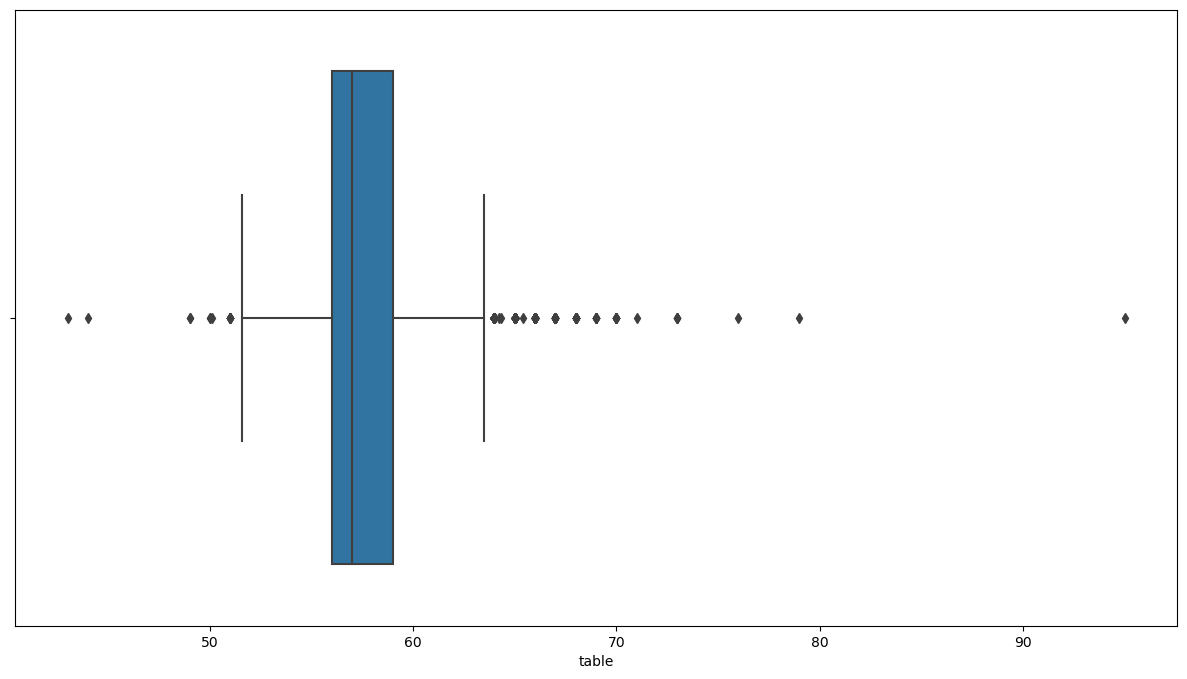

In [18]:
# You don't need to know for now how this plotting happens. Just focus on quartiles and remember Statistics sessions on IQR

plt.figure(figsize=(15, 8))  # We wanted our figsize to be 15 by 8. If you define dpi=200, the figure will be more clear.
sns.boxplot(x = df['table']);

# It would be more logical to look at the graphics first to detect the outlier candidates.
# When we examine our boxplot (whisker plot), we see that there are many extreme values.

<Figure size 1500x800 with 0 Axes>

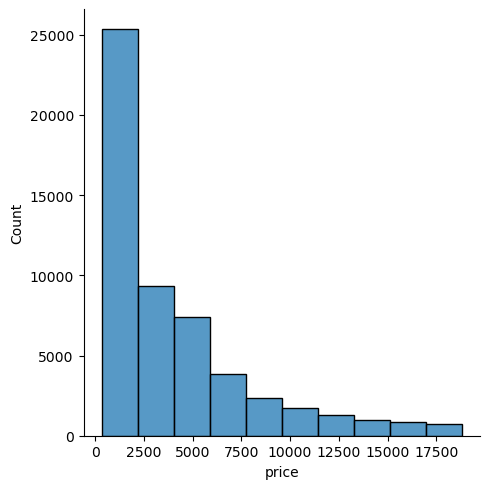

In [19]:
plt.figure(figsize = (15, 8))

sns.displot(df.price, bins=10, kde=False);

<Figure size 1500x800 with 0 Axes>

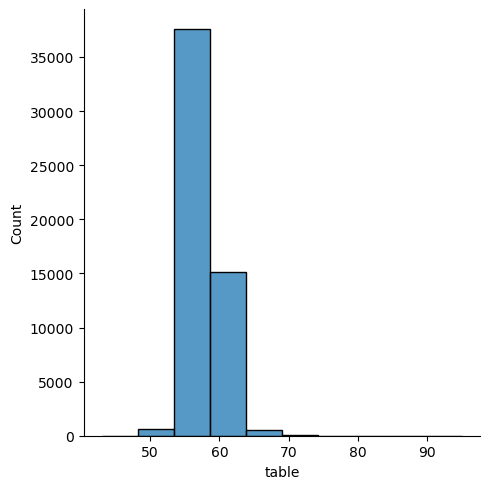

In [20]:
plt.figure(figsize = (15, 8))

sns.displot(df.table, bins=10, kde=False);

In [21]:
df.table.sort_values(ascending=True)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [22]:
# Let's see 10 of the values at the tail.

df.table.sort_values(ascending=True).tail(10)

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [23]:
# Let us take the indexes of these extreme values 

df.table.sort_values(ascending=True).tail(10).index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [24]:
# Let us assign the indexes of these extreme values to an object 

tail_index = df.table.sort_values(ascending=True).tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [25]:
# Let's make a more detailed analysis by calling the observations with these indexes as a dataframe.

df.loc[tail_index]

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


In [26]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [27]:
Q1 = df.table.describe().loc["25%"]
Q3 = df.table.describe().loc["75%"]
IQR = Q3 - Q1
IQR

3.0

**- Third way** of specifying **IQR** is using the **scipy.stats.iqr** method

In [28]:
from scipy import stats

IQR = stats.iqr(df.table)
IQR

3.0

In [29]:
lower_lim = Q1 - 1.5 * IQR  # We defined the lower limit creteria
upper_lim = Q3 + 1.5 * IQR  # We defined the upper limit creteria

In [30]:
lower_lim

51.5

In [31]:
upper_lim

63.5

In [32]:
(df.table < lower_lim).sum()  # We calculated how many values are under lower limit

16

In [33]:
(df.table > upper_lim).sum()  # We calculated how many values are above upper limit

589

In [34]:
# Let's see how many total potential outliers there are

df.table[(df.table < lower_lim) | (df.table > upper_lim)].count()

605

In [35]:
# Let us check how many observations not defined as outliers we have

df.table[~((df.table < lower_lim) | (df.table > upper_lim))].count()

53335

In [36]:
df.table[(df.table >= lower_lim) & (df.table <= upper_lim)].count()

53335

In [37]:
# The First Approach:

# Let's assign the observations in the "table" column and not defined as outliers to an object named "not_outliers"

not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)
not_outliers

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [38]:
# Let's create a DataFrame from the observations not defined as outliers named "cleaned_df"

cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [39]:
# The Second Approach:

# Let's find the index numbers of the observations defined as outliers 
    
df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [40]:
# Let us assign the index numbers of the observations defined as outliers to an object named "outlier_index"

outlier_index = df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [41]:
# It's time to drop the index numbers of the observations defined as outliers from the original DataFrame. 
# As such, the remaining observations not defined as outliers in the original df will create a new DatFrame

df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


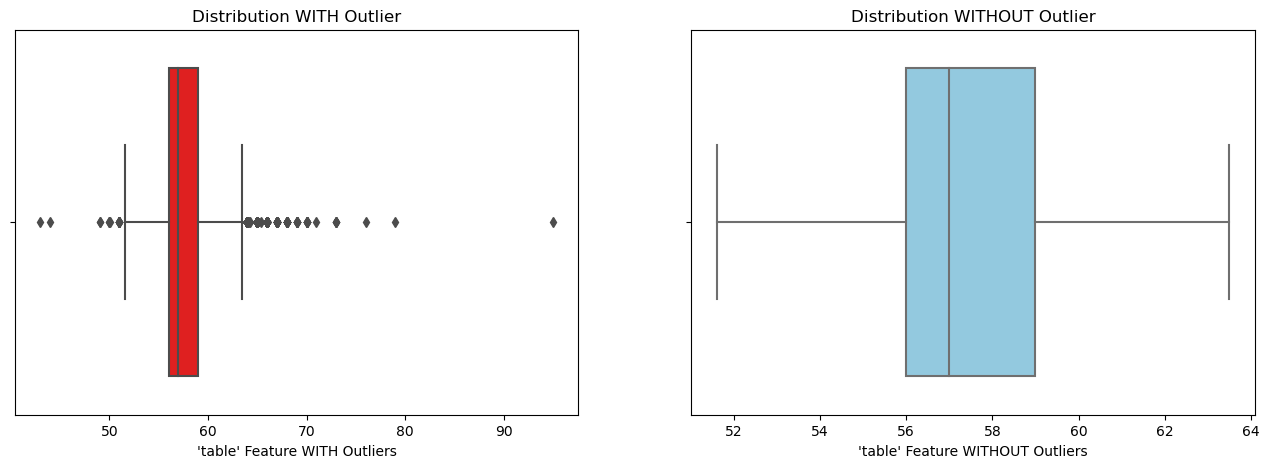

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

g = sns.boxplot(data=original_df, x="table", color="red", ax=ax[0]);
h = sns.boxplot(data=cleaned_df, x="table", color="skyblue", ax=ax[1])

ax[0].set(xlabel="'table' Feature WITH Outliers")
ax[1].set(xlabel="'table' Feature WITHOUT Outliers")

g.set_title('Distribution WITH Outlier')
h.set_title('Distribution WITHOUT Outlier');

# Having applied Tukey's Rule for detecting outliers and removing them from df, 
# no outliers left on the Boxplotchart as seen.

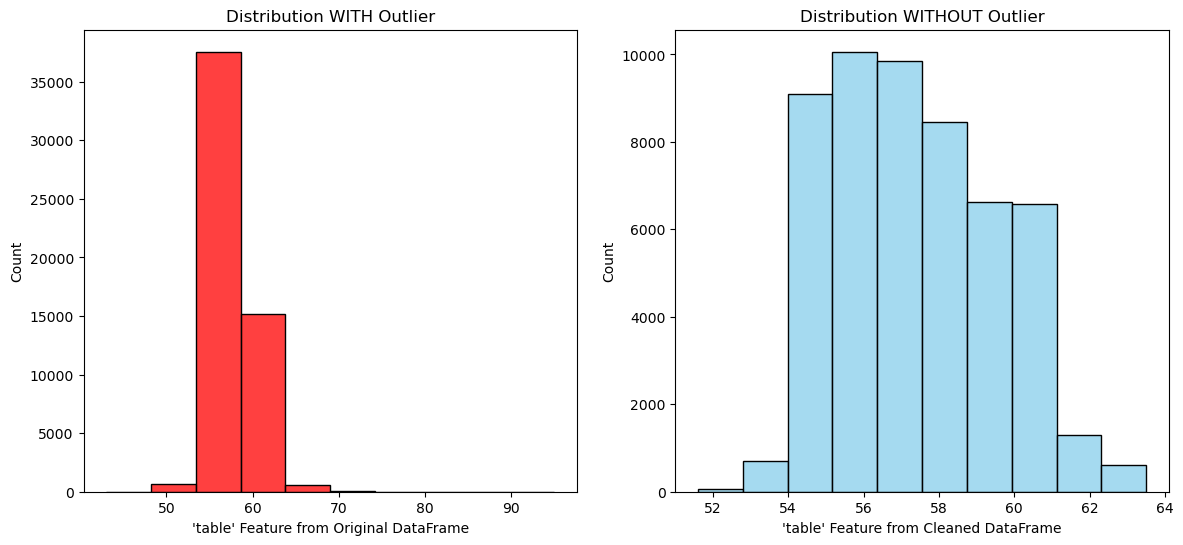

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

g = sns.histplot(original_df.table, bins=10, kde=False, color="red", label="With Outliers", ax=ax[0])
h = sns.histplot(cleaned_df.table, bins=10, kde=False, color="skyblue", label="Without Outliers", ax=ax[1])

ax[0].set(xlabel="'table' Feature from Original DataFrame")
ax[1].set(xlabel="'table' Feature from Cleaned DataFrame")

g.set_title('Distribution WITH Outlier')
h.set_title('Distribution WITHOUT Outlier');

# When we examine histograms for 2 DataFrames, after removing the outliers from our DataFrame, 
# it can be assumed that the distribution of observations approaches its normal distribution.

In [35]:
# Let us examine descriptive statistics for the DataFrame cleaned from outliers

cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [36]:
# Let us examine descriptive statistics for the original DataFrame not cleaned from outliers

original_df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [37]:
# Let us compare the descriptive statistics summary of  both DataFrames:

# The First Approach to Create DataFrame:

compare = pd.DataFrame(original_df.table.describe().values, index=original_df.table.describe().index, columns=["Original DataFrame"])
compare["Cleaned DataFrame"] = cleaned_df.table.describe().values
compare

,Original DataFrame,Cleaned DataFrame
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [38]:
# The Second Approach to Create DataFrame:

pd.DataFrame([df.table.describe(), cleaned_df.table.describe()], index=['original', 'drop']).T

,original,drop
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [44]:
# We first need to import winsorize function from mstats package of stats module of scipy which is a scientific computation library

from scipy.stats.mstats import winsorize

In [40]:
# let's first remember our DataFrame containing the extreme values

df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [41]:
# As we did above we will focus on "table" feature again:

pd.DataFrame(df.table.value_counts().sort_index())

,table
43.0,1
44.0,1
49.0,2
50.0,2
50.1,1
...,...
71.0,1
73.0,4
76.0,1
79.0,1


In [42]:
winsorized_table = winsorize(df.table, (0.02, 0.05))

winsorized_table = pd.DataFrame(winsorized_table, columns=["winsorized_table"])
winsorized_table = pd.DataFrame(winsorized_table.winsorized_table.value_counts().sort_index())
display(winsorized_table)
pd.DataFrame(df.table.value_counts().sort_index())

,winsorized_table
54.0,3372
54.1,30
54.2,28
54.3,17
54.4,28
...,...
60.6,3
60.7,9
60.8,5
60.9,8


,table
43.0,1
44.0,1
49.0,2
50.0,2
50.1,1
...,...
71.0,1
73.0,4
76.0,1
79.0,1


In [44]:
display(upper_lim, len(df.table[df.table > upper_lim]), len(df))

# Let's find the proportion of values higher than upper limit

b = len(df.table[df.table > upper_lim]) / len(df)
b

63.5

589

53940

0.010919540229885057

In [45]:
# Now if I write the proportions, assigned to a and b, that I found in this winsorize, I can do a more logical job.

table_win = winsorize(df.table, (a, b))
winsorized_table = pd.DataFrame(table_win, columns=["winsorized_table"])
winsorized_table

,winsorized_table
0,55.0
1,61.0
2,63.5
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


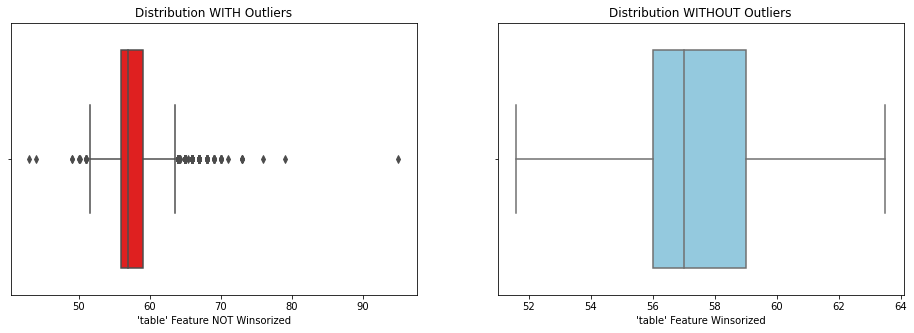

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

g = sns.boxplot(data=original_df, x="table", color="red", ax=ax[0]);
h = sns.boxplot(data=winsorized_table, x="winsorized_table", color="skyblue", ax=ax[1])

ax[0].set(xlabel="'table' Feature NOT Winsorized")
ax[1].set(xlabel="'table' Feature Winsorized")

g.set_title('Distribution WITH Outliers')
h.set_title('Distribution WITHOUT Outliers');

# Having applied winsorized() method for handling outliers, no outliers left on the Boxplotchart as seen.

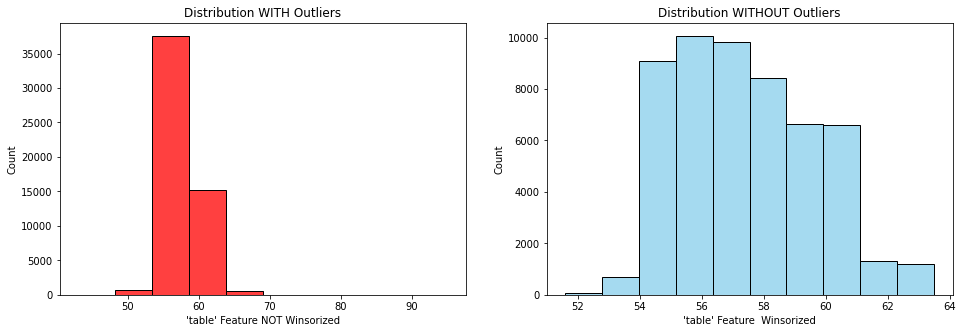

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

g = sns.histplot(original_df.table, bins=10, kde=False, color="red", label="With Outliers", ax=ax[0])
h = sns.histplot(winsorized_table.winsorized_table, bins=10, kde=False, color="skyblue", label="Without Outliers", ax=ax[1])

ax[0].set(xlabel="'table' Feature NOT Winsorized")
ax[1].set(xlabel="'table' Feature  Winsorized")

g.set(title="Distribution WITH Outliers")
h.set(title="Distribution WITHOUT Outliers");

In [48]:
# Let us remember winsorized object named "table_win"

table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [49]:
# Let us create a Series named "table_win_ser"  from "table_win" object

table_win_ser = pd.Series(table_win)
table_win_ser

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [50]:
pd.DataFrame([df.table.describe(), cleaned_df.table.describe(), table_win_ser.describe()], index=['original', 'drop', 'winsorize']).T

,original,drop,winsorize
count,53940.000000,53335.000000,53940.000000
mean,57.457184,57.373404,57.438591
std,2.234491,2.074349,2.161059
min,43.000000,51.600000,51.600000
25%,56.000000,56.000000,56.000000
50%,57.000000,57.000000,57.000000
75%,59.000000,59.000000,59.000000
max,95.000000,63.500000,63.500000


In [51]:
# Let's remember out upper and lower limits found by means of Tukey's Rule

upper_lim, lower_lim

(63.5, 51.5)

In [52]:
original = df.table.sort_values().head(20).reset_index(drop=True)
winsorized = table_win_ser.sort_values().head(20).reset_index(drop=True)

pd.DataFrame([original, winsorized]).T.rename(columns={"table": "Original", "Unnamed 0": "Winzorized"})

,Original,Winzorized
0,43.0,51.6
1,44.0,51.6
2,49.0,51.6
3,49.0,51.6
4,50.0,51.6
5,50.0,51.6
6,50.1,51.6
7,51.0,51.6
8,51.0,51.6
9,51.0,51.6


In [53]:
display(df.table[df.table < 51.6].count())
display(df.table[df.table == 51.6].count())

table_win_ser[table_win_ser == 51.6].count()

16

1

17

In [54]:
display(df.table[df.table > 63.5].count())
display(df.table[df.table == 63.5].count())

table_win_ser[table_win_ser == 63.5].count()

589

1

590

In [55]:
# Let's remember our DataFrame:

df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


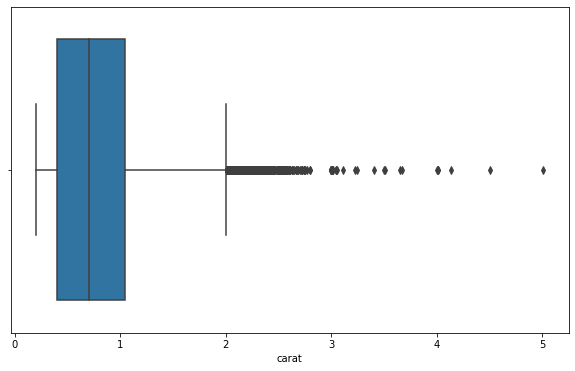

In [56]:
# It seems the "carat" feature has too many extreme values (outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df.carat);

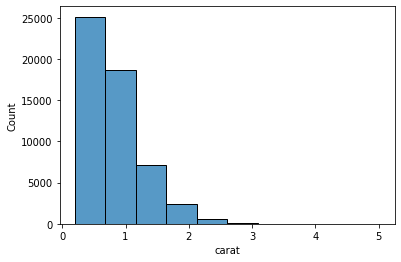

In [57]:
# Right skewed distribution occurs for "carat" feature since the long tail is on the right side of the distribution.

sns.histplot(df.carat, bins=10, kde=False);

In [58]:
# Let us examine what happens when np.log() method is applied 

np.log(df.carat)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

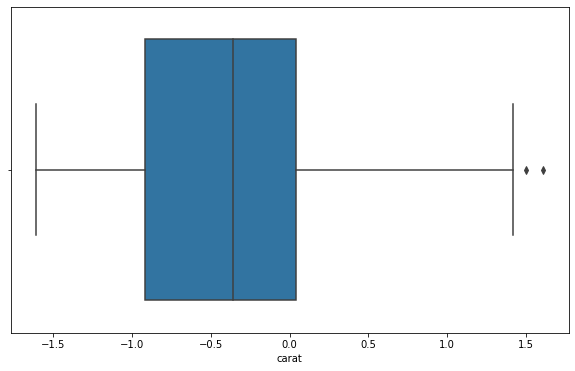

In [59]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = np.log(df.carat)); 

# We got the algorithm of all values in the "carat" column and examined the distribution of the observations with boxplot

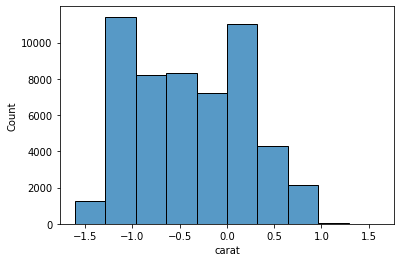

In [60]:
sns.histplot(np.log(df.carat),  bins=10, kde=False);

# We got the algorithm of all values in the "carat" column and examined the distribution of the observations with histogram

In [61]:
# Let's create a new feature named "carat_log" 

df["carat_log"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [62]:
df.carat_log.sort_values().tail()

25999    1.388791
25998    1.388791
27130    1.418277
27630    1.504077
27415    1.611436
Name: carat_log, dtype: float64

In [63]:
# If we hypothetically defined the biggest two observation as outliers, we can pick up their index numbers to remove from our DataFrame   

drop_index = df.carat_log.sort_values().tail(2).index
drop_index

Int64Index([27630, 27415], dtype='int64')

In [64]:
# Let's remove these two observations at the index number 27630 and 27415 from our DataFrame

df.drop(drop_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [65]:
# Again we can apply Tukey's Rule for defining and removing outliers from our DataFrame

Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)

IQR = Q3 - Q1
IQR

0.9555114450274363

In [66]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

lower_lim, upper_lim

(-2.3495578994153097, 1.472487880694436)

In [67]:
(df.carat_log > upper_lim).sum()

2

In [68]:
(df.carat_log <= lower_lim).sum()

0

In [69]:
# Let's see which observations are defined as outliers according to Tukey's Rule

df.loc[(df.carat_log > upper_lim)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [70]:
# After defining the index numbers of these observation, we can remove them from our DataFrame

drop_index = df.loc[(df.carat_log > upper_lim)].index
drop_index

Int64Index([27415, 27630], dtype='int64')

In [71]:
df.drop(drop_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [72]:
# Here we can define the observations not defined as outliers and assign them to an object

not_outliers = (df.carat_log <= upper_lim)

In [73]:
# let's examine how many observations are not defined as outliers

len(df[not_outliers])

53938

In [46]:
cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
